In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs



dimension de X: (100, 2)
dimension de Y: (100, 1)


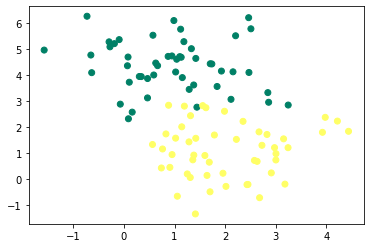

In [37]:
X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=0)
y=y.reshape((y.shape[0], 1))

print('dimension de X:', X.shape)
print('dimension de Y:', y.shape)

plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.show()


Fonction d'initialisation

In [38]:
def initialisation(X):
    W=np.random.randn(X.shape[1], 1)
    b=np.random.randn(1)
    return(W,b)



Modèle

In [39]:
def model(X, W,b):
    Z=X.dot(W) + b
    A=1/(1+np.exp(-Z))
    return A


In [40]:
def log_loss(A, y):
    return 1/len(y) * np.sum(-y * np.log(A) - (1-y) * np.log(1-A))
    

In [41]:
def gradients(A, X, y):
    dW =1/len(y) * np.dot(X.T, A-y)
    db=1/len(y) * np.sum(A-y)
    return (dW, db)
    

In [42]:
def update(dW, db, W, b, learning_rate):
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)


In [43]:
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialiser W, b
    W, b = initialisation(X)
    Loss=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    plt.plot(Loss)
    plt.show()
    return (W, b)


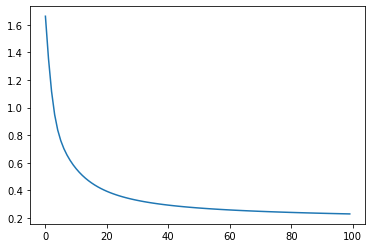

In [44]:
W, b =artificial_neuron(X, y)

In [45]:

def predict (X, W, b):
    A=model(X, W, b)
    return A>=0.5


Add accuracy score

In [46]:
from sklearn.metrics import accuracy_score
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialiser W, b
    W, b = initialisation(X)
    Loss=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
    
    y_pred= predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(Loss)
    plt.show()
    return (W, b)


0.9


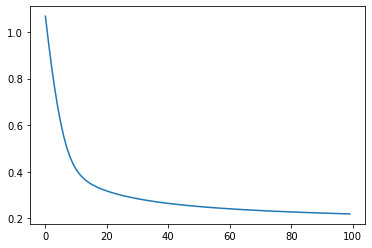

In [47]:
W, b =artificial_neuron(X, y)

Predict some new plant

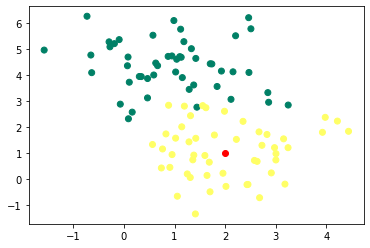

Cette nouvelle plante est toxique


In [48]:
new_plant = np.array([2,1])
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.show()
if (predict(new_plant, W, b)) == True:
    print('Cette nouvelle plante est toxique')
else:
    print('Cette nouvelle plante est saine')



Ajouter la droite de séparation qui sépare les deux catégories de plantes

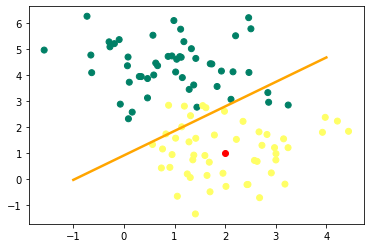

In [49]:
x0=np.linspace(-1, 4, 100)
x1= (- W[0] * x0 - b)/W[1]
plt.plot(x0,x1, c='orange', lw=2.5)
plt.scatter(X[:,0], X[:, 1], c=y, cmap='summer')
plt.scatter(new_plant[0], new_plant[1], c='red')
plt.show()

Saving the history of W, b and loss value's

In [50]:
from sklearn.metrics import accuracy_score
def artificial_neuron(X, y, learning_rate=0.1, n_iter=100):
    #initialiser W, b
    W, b = initialisation(X)
    Loss=[]
    history=[]
    for i in range(n_iter):
        A = model(X, W, b)
        Loss.append(log_loss(A, y))
        dW, db = gradients(A, X, y)
        W, b = update(dW, db, W, b, learning_rate)
        history.append([W, b, Loss, i])
    
    y_pred= predict(X, W, b)
    print(accuracy_score(y, y_pred))
    
    plt.plot(Loss)
    plt.show()
    return (W, b)
